In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('/home/kristina/code/g0zzy/stress_sense/raw_data/CombinedData.csv', index_col=0)
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [9]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
df.isna().sum()

statement    362
status         0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

statement    0
status       0
dtype: int64

In [28]:
df['status'].nunique()

7

In [14]:
df.status.value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [29]:
sentiment_counts=df['status'].value_counts()
print(sentiment_counts)

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

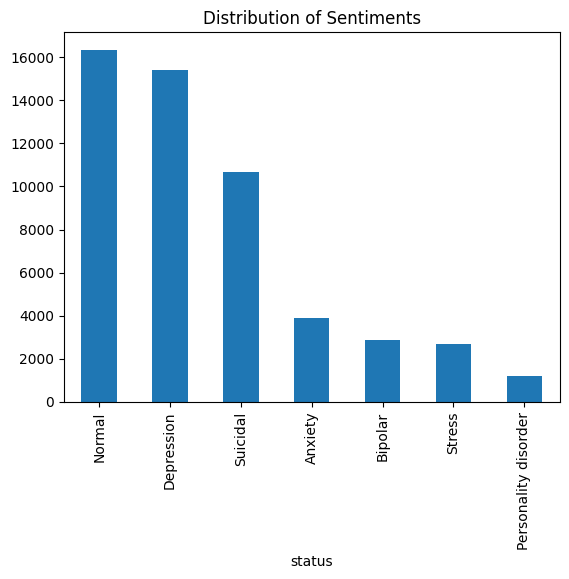

In [30]:
sentiment_counts.plot(kind='bar', title='Distribution of Sentiments')

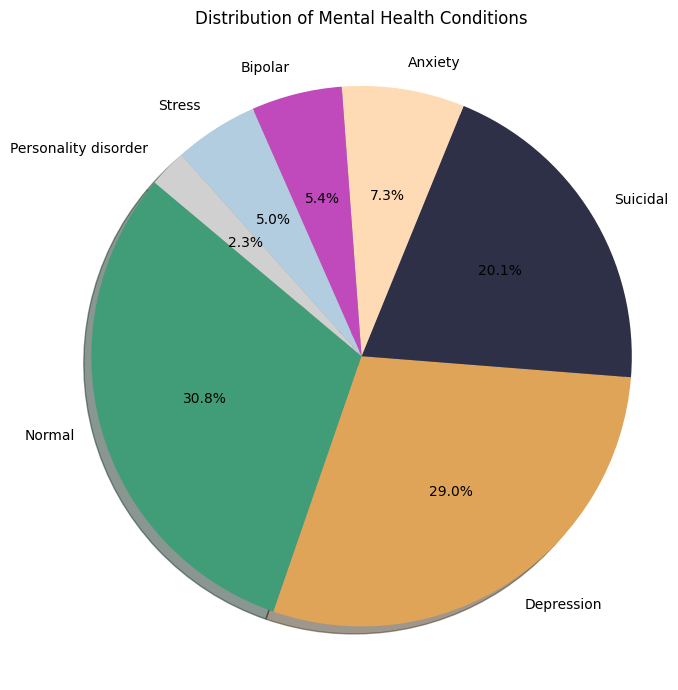

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

Text preprocessing

In [ ]:
#Lowercasing

df.rename(columns={'statement': 'original_statement'}, inplace=True)

df['statement']=df['original_statement'].str.lower()
df.head()


,original_statement,status,num_of_characters,statement
0,oh my gosh,Anxiety,10.0,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64.0,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78.0,"all wrong, back off dear, forward doubt. stay ..."
3,I've shifted my focus to something else but I'...,Anxiety,61.0,i've shifted my focus to something else but i'...
4,"I'm restless and restless, it's been a month n...",Anxiety,72.0,"i'm restless and restless, it's been a month n..."


In [39]:
#Removing URLs, handles, punctuation and special characters

def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', str(text))
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the function to the 'statement' column
df['statement'] = df['statement'].apply(remove_patterns)
df.head()

,original_statement,status,num_of_characters,statement
0,oh my gosh,Anxiety,10.0,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64.0,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78.0,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,61.0,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,72.0,im restless and restless its been a month now ...


In [40]:
#Tokenization
#Apply word_tokenize to each element in the 'statement' column
df['tokens'] = df['statement'].apply(word_tokenize)
df.head()

,original_statement,status,num_of_characters,statement,tokens
0,oh my gosh,Anxiety,10.0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64.0,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78.0,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,61.0,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,"I'm restless and restless, it's been a month n...",Anxiety,72.0,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


In [41]:
#Stemming
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df['tokens_stemmed'] = df['tokens'].apply(stem_tokens)

df.head()

,original_statement,status,num_of_characters,statement,tokens,tokens_stemmed
0,oh my gosh,Anxiety,10.0,oh my gosh,"[oh, my, gosh]",oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64.0,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",troubl sleep confus mind restless heart all ou...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78.0,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,61.0,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...",ive shift my focu to someth els but im still w...
4,"I'm restless and restless, it's been a month n...",Anxiety,72.0,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless and restless it been a month now b...


In [46]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Keep only stress-like categories
stress_posts = df[df['status'].isin(['Stress','Anxiety','Depression'])]['statement']
stress_posts

# Bag-of-words representation
cv = CountVectorizer(max_df=0.95, min_df=5, stop_words="english")
X_counts = cv.fit_transform(stress_posts)

# LDA topic model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# Show top words per topic
words = cv.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [words[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i}: {', '.join(top_words)}")

Topic 0: help, years, feel, life, like, depression, just, time, job, work
Topic 1: pain, really, know, feel, just, like, dont, ive, anxiety, im
Topic 2: years, think, things, feel, want, people, know, life, like, just
Topic 3: got, said, told, like, know, time, did, friend, just, wa
Topic 4: time, anymore, really, people, life, know, want, like, feel, just
